In [1]:
import pandas as pd
path = 'data/datasets.csv'
data = pd.read_csv(path)

In [2]:
# 잘 load 되었는지 확인
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=drop_cols, inplace=True)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [5]:
# 타겟값 변환:각 범주형 변수 수치 매핑
data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})

data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':1,'Travel_Rarely':2})
data['Gender'] = data['Gender'].map({'Female': 0,'Male': 1})
data['OverTime'] = data['OverTime'].map({'No': 0,'Yes': 1})

In [6]:
import numpy as np

data['TotalWorkingYears'] = data['TotalWorkingYears'].replace(0, np.nan)
data['HighPerformerQuit'] = ((data['PerformanceRating'] == 4) & 
                             (data['Attrition'] == 1)).astype(int)                # 고성과 이탈자 여부
data['JobHopFrequency'] = data['NumCompaniesWorked'] / data['TotalWorkingYears'] # 연평균 이직 횟수
data['PromotionDelay'] = data['YearsAtCompany'] - data['YearsSinceLastPromotion']# 승진까지 소요 기간
data['OverallSatisfaction'] = (
    data['EnvironmentSatisfaction'] + 
    data['JobSatisfaction'] + 
    data['RelationshipSatisfaction']
) / 3                                                                             # 평균 만족도
manager_roles = ['Manager', 'Research Director']
data['Is_Manager'] = ((data['JobRole'].isin(manager_roles)) & 
                      (data['JobLevel'] >= 3)).astype(int)                        # 고위직 여부

In [7]:
real_bad_columns = ['PerformanceRating','Education']
bad_4_columns = [
    'BusinessTravel',
    'DailyRate',
    'Gender',
    'JobLevel',
    'JobSatisfaction',
    'MonthlyRate',
    'NumCompaniesWorked',
    'RelationshipSatisfaction',
    'TrainingTimesLastYear',
    'YearsInCurrentRole',
]
data.drop(columns=real_bad_columns, inplace=True)
data.drop(columns=bad_4_columns,inplace=True)
data.head(5)

,Age,Attrition,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,MaritalStatus,...,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,HighPerformerQuit,JobHopFrequency,PromotionDelay,OverallSatisfaction,Is_Manager
0,41,1,Sales,1,Life Sciences,2,94,3,Sales Executive,Single,...,8.0,1,6,0,5,0,1.000000,6,2.333333,0
1,49,0,Research & Development,8,Life Sciences,3,61,2,Research Scientist,Married,...,10.0,3,10,1,7,0,0.100000,9,3.000000,0
2,37,1,Research & Development,2,Other,4,92,2,Laboratory Technician,Single,...,7.0,3,0,0,0,0,0.857143,0,3.000000,0
3,33,0,Research & Development,3,Life Sciences,4,56,3,Research Scientist,Married,...,8.0,3,8,3,0,0,0.125000,5,3.333333,0
4,27,0,Research & Development,2,Medical,1,40,3,Laboratory Technician,Married,...,6.0,3,2,2,2,0,1.500000,0,2.333333,0


In [8]:
print(len(data.columns))

24


In [9]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [11]:
import numpy as np
params = {
    'classifier__n_estimators': [200,300,400,500],
    'classifier__learning_rate': [1e-2,1e-1,],
    'classifier__max_depth': [1,2,3,4]
}

In [12]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Attrition')
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=128)

In [ ]:
from sklearn.model_selection import GridSearchCV

best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
scoring_list = ['accuracy','recall','f1']
scoring = scoring_list[1]
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=params, cv=5, scoring=scoring , verbose=1)
grid_search.fit(X_train, y_train)

# 가장 좋은 성능의 모델과 파라미터 저장
if grid_search.best_score_ > best_acc:
    best_acc = grid_search.best_score_
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# 3. 최적의 모델로 예측 및 평가
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]  # Yes일 확률

# 평가 출력
print(f"Model: xgb_clf with {scoring}")
print(f"Best Hyperparameters: {best_params}")
print(classification_report(y_test, y_pred))
print("==============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("==============================")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Model: xgb_clf with recall
Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 400}
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       247
           1       0.74      0.43      0.54        47

    accuracy                           0.88       294
   macro avg       0.82      0.70      0.74       294
weighted avg       0.87      0.88      0.87       294

Accuracy: 0.8843537414965986
ROC AUC: 0.8518


In [ ]:
from sklearn.metrics import f1_score

best_t = 0.0
best_f1 = 0.0

for t in range(1000):
    t = t / 1000
    y_pred = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1:
        best_t = t
        best_f1 = f1

print(f"💥 Best Threshold (F1 기준) = {best_t:.3f}")
print(f"📈 Best F1-score = {best_f1:.4f}")


💥 Best Threshold (F1 기준) = 0.262
📈 Best F1-score = 0.5870


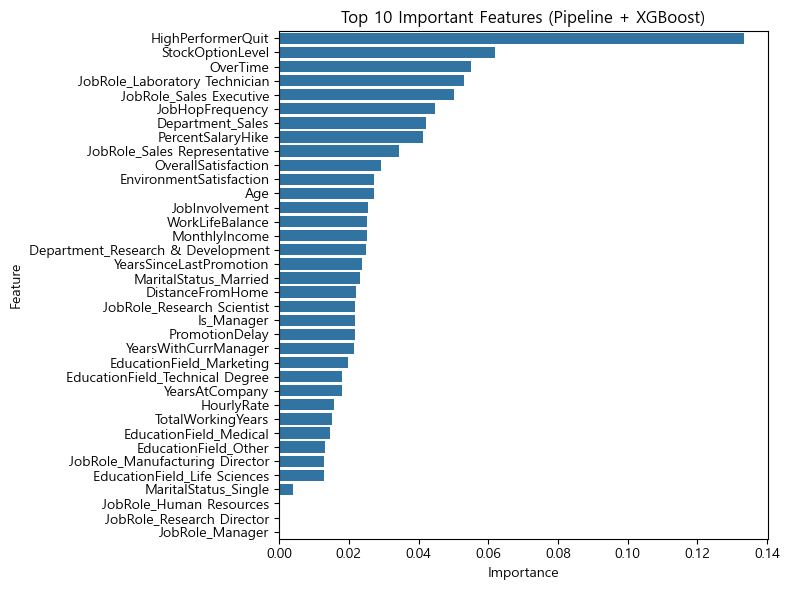

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. OneHotEncoder가 학습된 뒤 feature 이름 꺼내기
onehot_encoder = best_clf.named_steps['preprocessor'].named_transformers_['cat']
onehot_columns = onehot_encoder.get_feature_names_out(categorical_features)

# 4. 전체 feature 이름
feature_names = numeric_features + list(onehot_columns)

# 5. feature importance
importances = best_clf.named_steps['classifier'].feature_importances_

# 4. 중요도 매핑
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 5. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=coef_df)
plt.title("Top 10 Important Features (Pipeline + XGBoost)")
plt.savefig("pipeline+xgb.png")
plt.tight_layout()
plt.show()

In [ ]:
# 출력
coef_df

,Feature,Importance
14,HighPerformerQuit,0.133474
8,StockOptionLevel,0.061951
6,OverTime,0.054982
27,JobRole_Laboratory Technician,0.053034
32,JobRole_Sales Executive,0.050187
15,JobHopFrequency,0.044814
20,Department_Sales,0.042253
7,PercentSalaryHike,0.041331
33,JobRole_Sales Representative,0.034460
17,OverallSatisfaction,0.029302


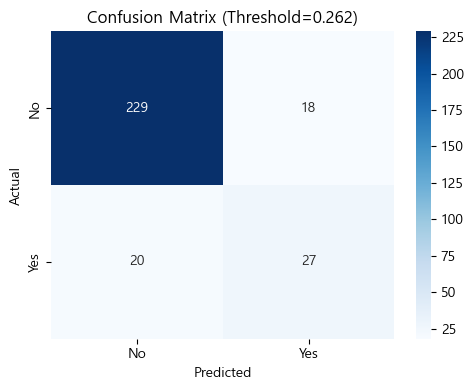

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

# ✅ Confusion Matrix
y_prob = best_clf.predict_proba(X_test)[:, 1]

y_pred_custom = (y_prob >= best_t).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={best_t:.3f})")
plt.tight_layout()
plt.show()

In [ ]:
# 104
# 208
# 382 - > recall 0.5정도
# 262
# ->239